## Future Plans
* Switch some graphs to candlesticks instead of line
* Backtesting Platform / Plug and play strategy builder
* Analysis Platform like Finviz
* News
* Pre-built strategies
* Suggestions if picks dont meet risk tolerance

### Risk Assment Tool

* Ability to bring in data for all asset classes(Securities/Indicies, Foreign Indicies, Bonds,  Commodities/Futures, Cryptocurrency).
* Generate overall score of the portfolio or each individual investment.
* Provide suggestion portfolios based on user risk tolerance. Create portfolio weights as percentages of assets(bonds, crypto, stock, etc)

## Core Message

* The goal of our project was to create a risk assesment tool that allows the end user to make calls using yfinance through user generated inputs. This tool has the ability to bring in data from various asset classes aviable through yfinance.
    
* Our tool is able to compare each asset class and create a risk assesmnet output based on the end users inputs. The end user is able to compare each asset for risk assesment via a dataframe and visualizations.
    
* The tool is able to provide an overall score indicating the specific risk of the portfolio based on various industry standard indicators. The output will provide the user with a low/Moderate/High rating and compare it to their risk tolerance level. 
---
## Key Questions 

* What types of risk management tools allow for a portfolio to take on some risk but allow for a rate of return that aligns with the end users goals? 
    
* How can we create something that allows investors to make decisions that lead to a portfolio that aligns with their desired risk while achieving their preferred rate of return? 
    
* How can we use the tools taught to us in this class to create something that can be used in the real world? 
    
* How do we determine which assesments should carry more weight or should they all be equal?

* How do we create a program that can create a portfolio that best fits your risk tolerance and investment goals?
---
##  Data
* We utilized juypter notebook to anyalze our data set and leveraged various imports to conditon the data in a way that allows us to detemrine a portfolios level of risk.
* yfinance api: Retrieving asset data
* pandas_datareader: Read API data
* pandas: Manipulate data and create data frames
* ipywidgets: Create dropdown and type cells to collect and store user input
* seaborn: Created multi-colored heatmap and regression plot
* matplotlib: Visualizations
* scipy: Linear Regression Plot
* panel: Create dashboard and tabs
* FinQuant: A program for financial portfolio management, analysis, and optimization. Used for portfolio assessment and efficient frontiers
  https://finquant.readthedocs.io/en/latest/index.html
---
* There wasn't much data cleaning to be done other than removing excess columns.
* We utilized assignments we completed in the past to condition and clean the data. 
---
## Summary & Conclusions:
* Our investment assessment tool helps investors understand risk and make better financial decisions.
1. Dropdown for Name, Email, Risk Tolerance, Tickers
​
2. Portfolio Assessment and Efficient Frontiers 
​
3. Benchmark Assessment
​
4. S&P 500 DataFrame, Returns, Plot Close, Standard Deviation/Plot
​
5. Assets DataFrame, Plot 
​
6. Daily Retrns DataFrame/Plot
​
7. Weighted Returns DataFrame/Plot
​
8. Custom Portfolio Data Frame, All Returns DataFrame, Combined Custom Portfolio & S&P 500
​
9. Cumulative Returns Plot
​
10. Standard Deviation/Rolling Standard Deviation Plot
​
11. Sharpe Ratio, Sortino Ratio, Variance
​
12. Correlation/Heatmap
​
13. Linear Regression Plot, Alpha, Beta, Capital Asset Pricing Model(CAPM)
​
14. Panel/Dashboard
---
## Implications: 
* Our findings are derived from industry standard calculations to determine and analyze risk. 
* Our risk score is based off of Beta and your portfolios overall volatility compared to the bench mark. 

---

### Import Data and Libraries

In [111]:
# Import data and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime
import panel as pn
import holoviews as hv
import hvplot.pandas
from scipy import stats
from panel.interact import interact
import seaborn as sns

import yfinance as yf
import ipywidgets as widget
from ipywidgets import interact
yf.pdr_override()



#plt.rcParams['figure.figsize'] = [20,10]
#sns.set(rc={'figure.figsize': (20,10)})

datetime.date.today().strftime('%Y-%m-%d' )

start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-1095))
end_date = datetime.date.today().strftime('%Y-%m-%d')

sp500 = pdr.get_data_yahoo('^GSPC', start_date, end_date)
sp500 = sp500[['Adj Close']].round(2)

%matplotlib inline

[*********************100%***********************]  1 of 1 completed


In [112]:
pn.extension()

### Dropdown Boxes

In [113]:
# Create dropdown boxes and type cells to input and store data.
style = {'description_width': 'initial'}
name_f = widget.Text(placeholder='Type Here', description='Name:', disabled=False)


email_f = widget.Text(placeholder='Type Here', description='Email Address:', style=style, disabled=False)

style = {'description_width': 'initial'}
risk_f = widget.Dropdown(
    options=[('Low', 1), ('Moderate', 2), ('High', 3)],
    value=1,
    description='Risk Tolerance:',
    style=style,
)

style = {'description_width': 'initial'}
tickers_f = widget.Text(placeholder='Type Here', description='Enter tickers, comma separated:', style=style, disabled=False)

display(name_f)
display(email_f)
display(risk_f)
display(tickers_f)

Text(value='', description='Name:', placeholder='Type Here')

Text(value='', description='Email Address:', placeholder='Type Here', style=DescriptionStyle(description_width…

Dropdown(description='Risk Tolerance:', options=(('Low', 1), ('Moderate', 2), ('High', 3)), style=DescriptionS…

Text(value='', description='Enter tickers, comma separated:', placeholder='Type Here', style=DescriptionStyle(…

In [114]:
name = name_f.value
email = email_f.value
risk = risk_f.value
tickers = tickers_f.value

In [115]:
print(name)
print(email)
print(risk)
tickers = [t.lstrip() for t in tickers.upper().split(',')]

chris
email
3


In [116]:
# Set weights and risk free rate
wt = [100/len(tickers) for i in tickers]
risk_free_rate = .005

### Portfolio Assessment

In [117]:
# Used for portfolio building
from finquant.portfolio import build_portfolio
names= tickers
pf = build_portfolio(names=names, data_api="yfinance")

[*********************100%***********************]  6 of 6 completed


In [119]:
pf.properties()


----------------------------------------------------------------------
Stocks: AAPL, AMZN, TSLA, JPM, KO, MCD
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.332
Portfolio Volatility: 0.252
Portfolio Sharpe Ratio: 1.297

Skewness:
       AAPL      AMZN      TSLA       JPM        KO       MCD
0  2.757389  2.166123  3.643087  1.689006  1.466317  2.189896

Kurtosis:
      AAPL      AMZN       TSLA      JPM        KO       MCD
0  9.03057  4.255556  19.130969  2.53125  1.176062  4.297254

Information:
   Allocation  Name
0    0.166667  AAPL
1    0.166667  AMZN
2    0.166667  TSLA
3    0.166667   JPM
4    0.166667    KO
5    0.166667   MCD
----------------------------------------------------------------------


### Efficient Frontiers

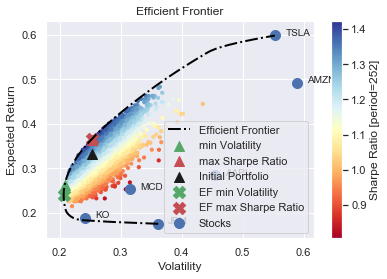

In [120]:
# performs and plots results of Monte Carlo run (5000 iterations)
opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
# plots the results of the Monte Carlo optimisation
pf.mc_plot_results()
# plots the Efficient Frontier
pf.ef_plot_efrontier()
# plots optimal portfolios based on Efficient Frontier
pf.ef.plot_optimal_portfolios()
# plots individual plots of the portfolio
pf.plot_stocks()

### Benchmark Assessment (S&P 500)

In [121]:
# Investment assessment of benchmark(S&P 500)
from finquant.portfolio import build_portfolio
names = ['^GSPC']
pf1 = build_portfolio(names=['^GSPC'], data_api="yfinance")
pf1.properties()

[*********************100%***********************]  1 of 1 completed
----------------------------------------------------------------------
Stocks: ^GSPC
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.075
Portfolio Volatility: 0.190
Portfolio Sharpe Ratio: 0.370

Skewness:
      ^GSPC
0  1.799657

Kurtosis:
      ^GSPC
0  2.648212

Information:
   Allocation   Name
0         1.0  ^GSPC
----------------------------------------------------------------------


In [122]:
# Import Benchmark Data(SP500)
sp500.rename(columns={"Adj Close": "S&P 500"},inplace=True)
sp500.head()

,S&P 500
Date,
2017-08-30,2457.59
2017-08-31,2471.65
2017-09-01,2476.55
2017-09-05,2457.85
2017-09-06,2465.54


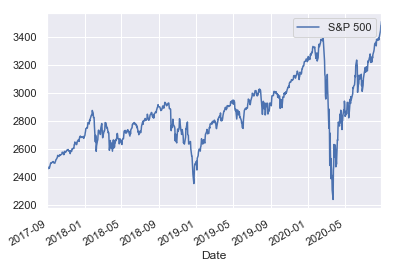

In [123]:
#Plot SP500
sp500.plot()

#### Daily Returns

In [124]:
# Calculate daily returns for benchmark
sp500_df = sp500.pct_change()[1:]
sp500_df.head()

,S&P 500
Date,
2017-08-31,0.005721
2017-09-01,0.001982
2017-09-05,-0.007551
2017-09-06,0.003129
2017-09-07,-0.000178


#### Standard Deviation

In [125]:
# STD of SP500
sp_std = sp500.std()
sp_std

S&P 500    229.315973
dtype: float64

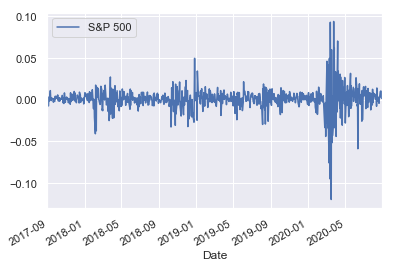

In [126]:
# Plot STD of SP500
sp500_df.plot()
plt.show()

### Custom Portfolio

In [127]:
# Create dataframe of portfolio assets
assets = pdr.get_data_yahoo(tickers, start_date, end_date)
assets = assets['Adj Close'].round(2)

assets.head()

[*********************100%***********************]  6 of 6 completed


,AAPL,AMZN,JPM,KO,MCD,TSLA
Date,,,,,,
2017-08-30,156.90,967.59,83.81,41.11,149.09,353.18
2017-08-31,157.53,980.60,83.43,41.25,149.50,355.90
2017-09-01,157.57,978.25,84.17,41.46,149.35,355.40
2017-09-05,155.68,965.27,82.16,41.59,148.69,349.59
2017-09-06,155.52,967.80,82.71,41.63,147.87,344.53


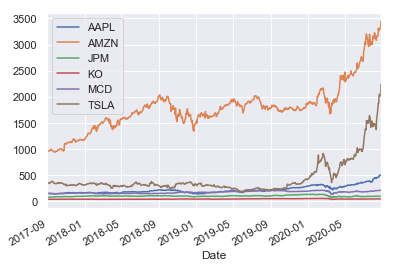

In [128]:
# Plot all portfolio assets
assets.plot()
plt.show()

#### Daily Returns

In [129]:
# Daily returns for all portfolio assets
daily_returns= assets.pct_change()[1:]
daily_returns.head()

,AAPL,AMZN,JPM,KO,MCD,TSLA
Date,,,,,,
2017-08-31,0.004015,0.013446,-0.004534,0.003405,0.002750,0.007701
2017-09-01,0.000254,-0.002396,0.008870,0.005091,-0.001003,-0.001405
2017-09-05,-0.011995,-0.013269,-0.023880,0.003136,-0.004419,-0.016348
2017-09-06,-0.001028,0.002621,0.006694,0.000962,-0.005515,-0.014474
2017-09-07,-0.004051,0.012058,-0.017531,0.006966,0.010617,0.017647


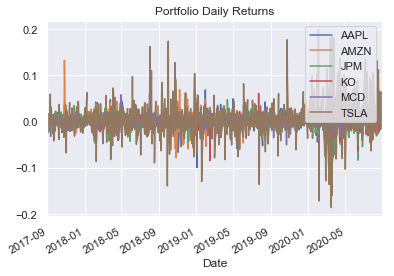

In [130]:
# Plot Portfolio Daily Returns
dr = daily_returns.plot()
dr.set_title('Portfolio Daily Returns')
plt.show()

### Weighted Returns

In [131]:
# Weighted Returns
# wt = 3
weighted_returns = (wt * daily_returns)
weighted_returns.head()

,AAPL,AMZN,JPM,KO,MCD,TSLA
Date,,,,,,
2017-08-31,0.066922,0.224096,-0.075568,0.056758,0.045834,0.128358
2017-09-01,0.004232,-0.039942,0.147829,0.084848,-0.016722,-0.023415
2017-09-05,-0.199911,-0.221143,-0.398004,0.052259,-0.073652,-0.272463
2017-09-06,-0.017129,0.043684,0.111571,0.016029,-0.091914,-0.241235
2017-09-07,-0.067515,0.200971,-0.292186,0.116102,0.176957,0.294120


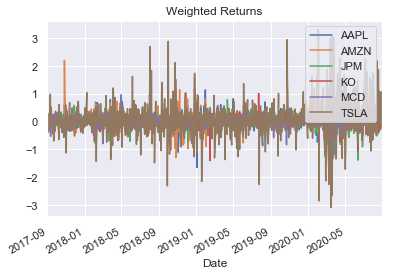

In [132]:
# Plot Weighted Returns
wr = weighted_returns.plot()
wr.set_title('Weighted Returns')
wr
plt.show()

### Combine Assets

In [133]:
# Concat Daily returns from assets in portfolio and benchmark
all_returns =  pd.concat([daily_returns, sp500_df], axis='columns', join='inner')
all_returns.head()

,AAPL,AMZN,JPM,KO,MCD,TSLA,S&P 500
Date,,,,,,,
2017-08-31,0.004015,0.013446,-0.004534,0.003405,0.002750,0.007701,0.005721
2017-09-01,0.000254,-0.002396,0.008870,0.005091,-0.001003,-0.001405,0.001982
2017-09-05,-0.011995,-0.013269,-0.023880,0.003136,-0.004419,-0.016348,-0.007551
2017-09-06,-0.001028,0.002621,0.006694,0.000962,-0.005515,-0.014474,0.003129
2017-09-07,-0.004051,0.012058,-0.017531,0.006966,0.010617,0.017647,-0.000178


In [134]:
# Create dataframe for custom portfolio
portfolio = weighted_returns.sum(axis=1)
custom_portfolio = (portfolio + 1).cumprod()
custom_portfolio= pd.DataFrame(custom_portfolio).rename(columns={0 : 'Custom Portfolio'})

custom_portfolio.head()

,Custom Portfolio
Date,
2017-08-31,1.446400
2017-09-01,1.673239
2017-09-05,-0.188933
2017-09-06,-0.155115
2017-09-07,-0.221574


In [135]:
# Concat custom portfolio and benchmark
comb_returns = pd.concat([custom_portfolio, sp500_df], axis='columns', join='inner')
comb_returns.head()

,Custom Portfolio,S&P 500
Date,,
2017-08-31,1.446400,0.005721
2017-09-01,1.673239,0.001982
2017-09-05,-0.188933,-0.007551
2017-09-06,-0.155115,0.003129
2017-09-07,-0.221574,-0.000178


### Cumulative Returns

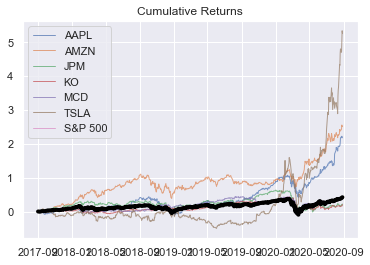

In [136]:
# Cumulative Returns of Portfolio
cumulative_returns=(1+all_returns).cumprod()-1
plt.figure()
plt.plot(cumulative_returns.iloc[:, 0:7], linewidth=1, alpha=0.7)
plt.plot(cumulative_returns.iloc[:,-1], label="S&P500", linewidth=4, color='black', alpha=1) # Second plot combines first and second together
cols = list(cumulative_returns.iloc[:, 0:7].columns)
##cols.append("S&P500")
plt.legend(cols)
#cr= cumulative_returns.iloc[:, -1].plot(figsize=(20,10))
plt.title('Cumulative Returns')
plt.show()

### Standard Deviation
* The standard deviation is a statistic that measures the dispersion of a dataset relative to it's mean and is calculated as the square root of the variance.

In [137]:
# Standard Deviation
daily_std = daily_returns.std()
daily_std

AAPL    0.020741
AMZN    0.020323
JPM     0.021354
KO      0.014468
MCD     0.017178
TSLA    0.040181
dtype: float64

### Rolling Standard Deviation

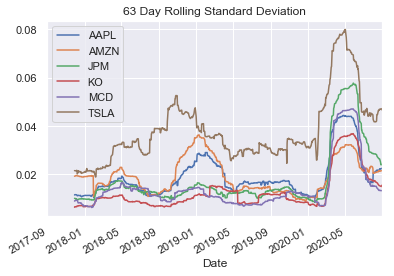

In [138]:
# Plot 63 Day Rolling Standard Deviation
ds = daily_returns.rolling(window=63).std().plot()
ds.set_title('63 Day Rolling Standard Deviation')
plt.show()

### Sharpe Ratio
* The Sharpe Ratio is used to understand the return of an investment compared to it's risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk
* Sharpe Ratio = return of portfolio - risk-free rate / STD of portfolios excess returns

In [139]:
# Calculate individual sharpe ratios
sharpe_ratios = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
sharpe_ratios.sort_values()

JPM     0.370574
KO      0.395752
MCD     0.584223
TSLA    1.278765
AAPL    1.340407
AMZN    1.463808
dtype: float64

### Sortino Ratio
* The Sortino Ratio is a variation of the Sharpe Ratio that differentiates harmful volatility from total overall volatility by using the asset's STD of the negative portfolio returns downside deviation instead of total STD of portfolio returns.
* Sortino Ratio = Actual/Expected porfolio return - Risk-free rate / STD of the downside

In [140]:
# Calculate Sortino Ratio
ab = pd.DataFrame(custom_portfolio)
rfr = 0
target = 0
ab.loc[ab['Custom Portfolio'] < target, 'downside_returns'] = ab['Custom Portfolio']**2
#downside_returns = df.loc[df['Custom Portfolio']]
expected_return = ab['Custom Portfolio'].mean()
down_stdev = np.sqrt(ab['downside_returns'].mean())
sortino_ratio = (expected_return - rfr)/down_stdev
print(f" The Sortino Ratio is {sortino_ratio.round(2)}%")

 The Sortino Ratio is 62.9%


### Variance
* Variance is a statistical measurement of the spread between numbers in a data set. It measures how far each number is from the mean and every number in the set. 
* variance = Epsilon(i data point in data set - population mean)sq / Number of data points in population

In [141]:
# Calculate Variance
var = assets.var()
var

AAPL      5135.839525
AMZN    225305.282518
JPM        142.208510
KO          22.741773
MCD        461.612834
TSLA    114085.863135
dtype: float64

### Correlation

* Correlation coefficient is a statistical measure of strength of the relationship between relative movements of two variables. 
* Values range between -1.0 and 1.0
* A correlation of -1.0 shows a perfect negative correlation and a correlation of 1.0 shows a perfect positive correlation. 
* pxy = Covariance(x,y) / std(x) and std(y)

In [142]:
# Calculate correlation between assets
correlation =  daily_returns.corr()
cm = sns.light_palette("green", as_cmap=True)
s = correlation.style.background_gradient(cmap=cm)
s

,AAPL,AMZN,JPM,KO,MCD,TSLA
AAPL,1,0.627275,0.560261,0.450167,0.494403,0.396057
AMZN,0.627275,1,0.352523,0.252915,0.298496,0.374985
JPM,0.560261,0.352523,1,0.584262,0.588982,0.300208
KO,0.450167,0.252915,0.584262,1,0.541079,0.23724
MCD,0.494403,0.298496,0.588982,0.541079,1,0.349526
TSLA,0.396057,0.374985,0.300208,0.23724,0.349526,1


### Heatmap

Text(0.5, 1.0, 'Portfolio Heat Map')

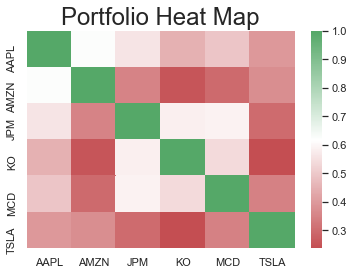

In [143]:
# Create Heat Map
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
ax = sns.heatmap(correlation, cmap=cmap)
plt.title("Portfolio Heat Map", size=24)

### Portfolio vs Benchmark Returns

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed


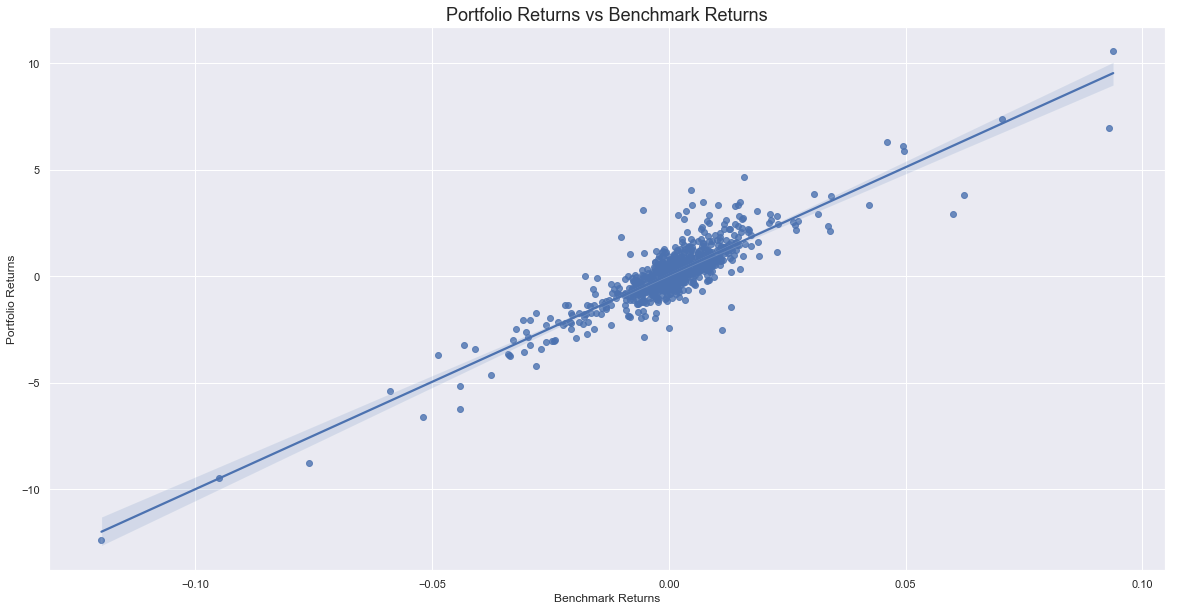

In [144]:
# Create Linear Regression Plot
price_data = pdr.get_data_yahoo(tickers, start_date, end_date)

price_data = price_data['Adj Close']

ret_data = price_data.pct_change()[1:]

port_ret = (ret_data * wt).sum(axis = 1)

benchmark_price = pdr.get_data_yahoo('^GSPC',
                               start_date,
                               end_date)
                               
benchmark_ret = benchmark_price["Adj Close"].pct_change()[1:]

%matplotlib inline

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.regplot(benchmark_ret.values,
port_ret.values, ax=ax)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns", size=18)
plt.show()

In [145]:
(beta, alpha) = stats.linregress(benchmark_ret.values,
                port_ret.values)[0:2]

### Capital Asset Pricing Model(CAPM)
* The Capital Asset Pricing Model describes the relationship between systematic risk and expected return for assets, particularly stocks. 
* Widely used for pricing risky securities and generating expected returns for assets given the risk of those assets and cost of capital.
* CAPM: Expected return of investment = Risk-free rate + Beta of investment(Expected return of market - Risk-free rate)'''''''Expected return of market - Risk-free rate= Market Risk Premium

In [146]:
# Create Capital Asset Pricing Model(CAPM)
capm = .005 + beta*.795
capm
print(f" The Capital Asset Pricing Model score is {capm.round(2)}")

 The Capital Asset Pricing Model score is 80.11


In [147]:
# Create functions for panel
def pf_properties():
    from finquant.portfolio import build_portfolio
    names = tickers
    pf = build_portfolio(names=names, data_api="yfinance")
    prop = pf.properties()
    return prop
        
def efficient_frontiers():
    #opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
    fig, ax = plt.subplots()
    pf.mc_plot_results()
    pf.ef_plot_efrontier()
    pf.ef.plot_optimal_portfolios()
    ax = pf.plot_stocks()
    return  fig

####def alpha():
   ## (alpha) = stats.linregress(benchmark_ret.values,
    ## port_ret.values)[0:2]        # This is g2g
   ## print("The portfolio alpha is", round(alpha,4))
   ## return alpha[:1]

##def beta():
  ##  (beta) = stats.linregress(benchmark_ret.values, port_ret.values)[0:2]
    ##print("The portfolio beta is", round(beta, 4))
    ##return beta[:1]
    
def correlation():
    correlation =  daily_returns.corr()
    cm = sns.light_palette("green", as_cmap=True)             
    s = correlation.style.background_gradient(cmap=cm)
    return s

def heatmap():
    fig, ax = plt.subplots()
    correlation = daily_returns.corr()
    #from  matplotlib.colors import LinearSegmentedColormap
    #cm = sns.light_palette("green", as_cmap=True)
    #cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)     
    sns.heatmap(correlation, cmap=cmap, ax=ax)
    #return sns.heatmap(correlation, cmap=cmap)
    return pn.pane.Matplotlib(fig)

def variance():
    var = assets.var()  
    return var

def sort_ratio():
    ab = pd.DataFrame(custom_portfolio)
    rfr = 0
    target = 0
    ab.loc[ab['Custom Portfolio'] < target, 'downside_returns'] = ab['Custom Portfolio']**2     
    expected_return = ab['Custom Portfolio'].mean()
    down_stdev = np.sqrt(ab['downside_returns'].mean())
    sortino_ratio = (expected_return - rfr)/down_stdev
    return sortino_ratio

def sharpe_ratio():
    sharpe_ratios = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252)) 
    sharpe_ratios.sort_values()
    return sharpe_ratios

def rolling_std():
    fig, ax = plt.subplots()
    ds = daily_returns.rolling(window=63).std()    
#     ds.set_title('63 Day Rolling Standard Deviation')
    ax.plot(ds)
    ax.set_title('63 Day Rolling Standard Deviation')
    return pn.pane.Matplotlib(fig) 
        
def comb_ret():
    comb_returns = pd.concat([custom_portfolio, sp500_df], axis='columns', join='inner')  
    return comb_returns.head()    
     
def wt_ret():
    weighted_returns = (wt * daily_returns)   
    return weighted_returns.head()    
    
def weighted_returns_plot():
    fig, ax = plt.subplots()
    ax.plot(weighted_returns)
    ax.set_title('Weighted Returns') 
    return pn.pane.Matplotlib(fig)
        
def all_return():
    all =  pd.concat([daily_returns, sp500_df], axis='columns', join='inner')   
    return all_returns.head()
        
def cum_ret():
    cumulative_returns=(1+all_returns).cumprod()-1             
    fig, ax = plt.subplots()
 #   fig.figure(figsize=(8,4))
    ax.plot(cumulative_returns.iloc[:, 0:7], linewidth=1, alpha=0.7)
    ax.plot(cumulative_returns.iloc[:,-1], label="S&P500", linewidth=4, color='black', alpha=1) # Second plot combines first and second together
    cols = list(cumulative_returns.iloc[:, 0:7].columns)
    cols.append("S&P500")
    ax.legend(cols)
    ax.set_title('Cumulative Returns')
    return fig
    ##return cumulative_returns.plot(figsize=(20,10))

def assets_plot():
    fig, ax = plt.subplots()
    ##aspt = assets.plot()     
    #plt.show()
    ax.plot(assets)
    return pn.pane.Matplotlib(fig)

def sp500_std():
    sp = sp500.std()    
    return sp

Launching server at http://localhost:57339


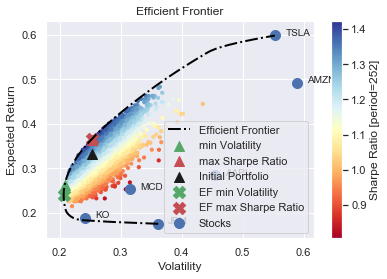

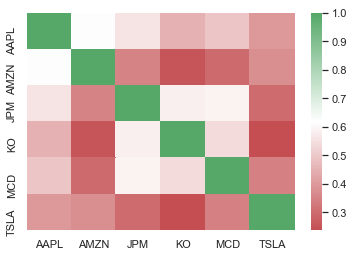

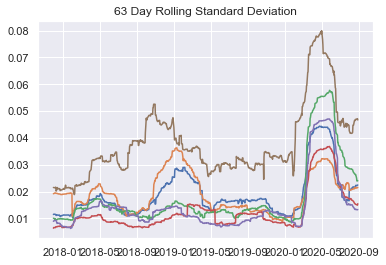

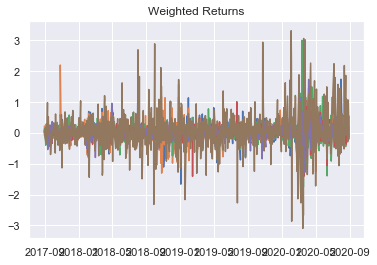

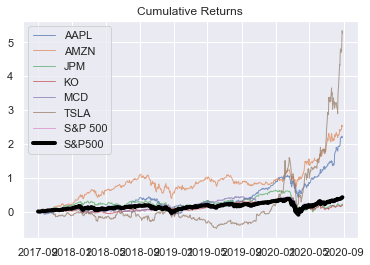

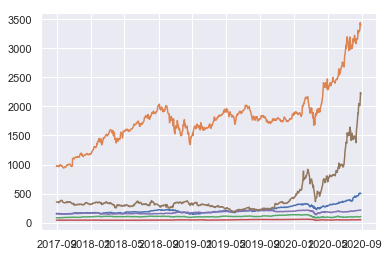

In [148]:
# Create tabs and dashboard
df_col = pn.Row(
#"## Assessing Risk on Custom Portfolio Over Last 36 Months",
    correlation(),
    comb_ret(),
    wt_ret(),
    all_return(),
)

plots_col = pn.Row(
    efficient_frontiers(),
    heatmap(),
    rolling_std(),
    weighted_returns_plot(),
    cum_ret(),
    assets_plot(),
)

data_col = pn.Column(
    sp500_std(),
    sharpe_ratio(),
    sort_ratio(),
    variance(),
   # alpha_beta(),
    #cap(),
   # pf_properties(),
)

dashboard = pn.Tabs(
    ("Data Frames", df_col),
    ("Visualizations", plots_col ),
    ("Data", data_col ),
)

dashboard.show()